# Preprocessing and Modeling

In [279]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mintaekhong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Import Labeled Data

In [280]:
sandy_hurricane = pd.read_csv('./CrisisLexT6/2012_Sandy_Hurricane/2012_Sandy_Hurricane-ontopic_offtopic.csv')
alberta_floods = pd.read_csv('./CrisisLexT6/2013_Alberta_Floods/2013_Alberta_Floods-ontopic_offtopic.csv')
boston_bombing = pd.read_csv('./CrisisLexT6/2013_Boston_Bombings/2013_Boston_Bombings-ontopic_offtopic.csv')
oklahoma_tornado = pd.read_csv('./CrisisLexT6/2013_Oklahoma_Tornado/2013_Oklahoma_Tornado-ontopic_offtopic.csv')
queensland_flood = pd.read_csv('./CrisisLexT6/2013_Queensland_Floods/2013_Queensland_Floods-ontopic_offtopic.csv')
texas_explosion = pd.read_csv('./CrisisLexT6/2013_West_Texas_Explosion/2013_West_Texas_Explosion-ontopic_offtopic.csv')

In [281]:
# sandy_hurricane = pd.read_csv('./2012_Sandy_Hurricane-ontopic_offtopic.csv')
# alberta_floods = pd.read_csv('./2013_Alberta_Floods-ontopic_offtopic.csv')
# boston_bombing = pd.read_csv('./2013_Boston_Bombings-ontopic_offtopic.csv')
# oklahoma_tornado = pd.read_csv('./2013_Oklahoma_Tornado-ontopic_offtopic.csv')
# queensland_flood = pd.read_csv('./2013_Queensland_Floods-ontopic_offtopic.csv')
# texas_explosion = pd.read_csv('./2013_West_Texas_Explosion-ontopic_offtopic.csv')

In [282]:
tokenizer = RegexpTokenizer(r'\w+')

In [283]:
lemmatizer = WordNetLemmatizer()

In [284]:
tfidf = TfidfVectorizer(ngram_range=(1,2), 
                        stop_words = 'english', 
                        min_df = 25, 
                        max_df = 1.0)

### Sandy Hurricane

In [285]:
sandy_hurricane.head()

,tweet id,tweet,label
0,'262596552399396864',I've got enough candles to supply a Mexican fa...,off-topic
1,'263044104500420609',Sandy be soooo mad that she be shattering our ...,on-topic
2,'263309629973491712',@ibexgirl thankfully Hurricane Waugh played it...,off-topic
3,'263422851133079552',@taos you never got that magnificent case of B...,off-topic
4,'262404311223504896',"I'm at Mad River Bar &amp; Grille (New York, N...",off-topic


#### Rename Columns

In [286]:
sandy_hurricane.rename(columns = {'tweet id': 'id',
                                  ' tweet': 'text',
                                  ' label': 'label'},
                       inplace=True)

#### One-Hot Encoding

One-hot encode column `on-topic` and save as `sandy_hurricane_df`: 
-  1 = on-topic, tweet is related to a disaster
-  0 = off-topic, tweet is *not* related to a disaster

In [287]:
sandy_hurricane_df = pd.get_dummies(data=sandy_hurricane, 
                                    columns=['label'], 
                                    drop_first=True)

### Add `type` Column

Add a column to indicate the type of disaster it is. This will be necessary when combining all dataframes later on.

In [288]:
sandy_hurricane_df['type'] = 'hurricane'

### Repeat for all other labeled datasets:

### Alberta Floods

In [289]:
alberta_floods.rename(columns = {'tweet id': 'id',
                                 ' tweet': 'text',
                                 ' label': 'label'},
                      inplace=True)

In [290]:
alberta_floods_df = pd.get_dummies(data=alberta_floods, 
                                   columns=['label'], 
                                   drop_first=True)

In [291]:
alberta_floods_df['type'] = 'flood'

TFIDF Alberta Floods for LogReg:

In [292]:
alberta_floods_df.head()

,id,text,label_on-topic,type
0,'348351442404376578',@Jay1972Jay Nope. Mid 80's. It's off Metallica...,0,flood
1,'348167215536803841',Nothing like a :16 second downpour to give us ...,0,flood
2,'348644655786778624',@NelsonTagoona so glad that you missed the flo...,1,flood
3,'350519668815036416',"Party hard , suns down , still warm , lovin li...",0,flood
4,'351446519733432320',@Exclusionzone if you compare yourself to wate...,0,flood


### Boston Bombing

In [295]:
boston_bombing.rename(columns = {'tweet id': 'id',
                                 ' tweet': 'text',
                                 ' label': 'label'},
                      inplace=True)

In [296]:
boston_bombing_df = pd.get_dummies(data=boston_bombing, 
                                   columns=['label'], 
                                   drop_first=True)

In [297]:
boston_bombing_df['type'] = 'bombing'

### Oklahoma Tornado

In [298]:
oklahoma_tornado.rename(columns = {'tweet id': 'id',
                                   ' tweet': 'text',
                                   ' label': 'label'},
                       inplace=True)

In [299]:
oklahoma_tornado_df = pd.get_dummies(data=oklahoma_tornado, 
                                     columns=['label'], 
                                     drop_first=True)

In [300]:
oklahoma_tornado_df['type'] = 'tornado'

### Queensland Flood

In [301]:
queensland_flood.rename(columns = {'tweet id': 'id',
                                   ' tweet': 'text',
                                   ' label': 'label'},
                       inplace=True)

In [302]:
queensland_flood_df = pd.get_dummies(data=queensland_flood, 
                                     columns=['label'], 
                                     drop_first=True)

In [303]:
queensland_flood_df['type'] = 'flood'

### Texas Explosion

In [304]:
texas_explosion.rename(columns = {'tweet id': 'id',
                                  ' tweet': 'text',
                                  ' label': 'label'},
                       inplace=True)

In [305]:
texas_explosion_df = pd.get_dummies(data=texas_explosion, 
                                    columns=['label'], 
                                    drop_first=True)

In [306]:
texas_explosion_df['type'] = 'explosion'

### Combine DataFrames

Combine all processed dataframes into one comprehensive dataframe with each tweet related to its respective disaster.

In [307]:
final_labeled_df = pd.concat([sandy_hurricane_df, 
                             alberta_floods_df, 
                             oklahoma_tornado_df, 
                             queensland_flood_df])

In [308]:
final_labeled_df.shape

(40064, 4)

We have a total of 60,082 observations and 3 features.

In [309]:
final_labeled_df.head()

,id,text,label_on-topic,type
0,'262596552399396864',I've got enough candles to supply a Mexican fa...,0,hurricane
1,'263044104500420609',Sandy be soooo mad that she be shattering our ...,1,hurricane
2,'263309629973491712',@ibexgirl thankfully Hurricane Waugh played it...,0,hurricane
3,'263422851133079552',@taos you never got that magnificent case of B...,0,hurricane
4,'262404311223504896',"I'm at Mad River Bar &amp; Grille (New York, N...",0,hurricane


## Preprocessing

### Clean Text

In order to remove any text that will only contribute noise to our model, we will define a function that uses regular expressions to replace certain patterns:

-  **Convert all text to lower case**
-  **Remove additional white sapce**
-  **Remove links:** 
    -  Links starting with `www.` or `https?://:` are replaced with `URL`. Each link is most likely to be unique to the tweet and won't provide any information in regards to the content overall. 
-  **Eliminate hashtags**
-  **Remove `@`** 

In [310]:
def processTweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = re.sub('@', '', tweet)
    return tweet

In [311]:
final_labeled_df['processed'] = [processTweet(i) for i in final_labeled_df['text']]

### Tokenize

We instantiate tokenizer and define the search pattern using `r'\w+` as our regular expression. We only want to search through words and omit digits and symbols.

In [312]:
tokenizer = RegexpTokenizer(r'\w+')

We tokenize the `processed` column and create a new column (`tokenized`) for our results.

In [313]:
final_labeled_df['tokenized'] = final_labeled_df['processed'].map(lambda x: tokenizer.tokenize(x))

### Lemmatize

We will lemmatize our data in an attempt to return the base form of each word.

In [314]:
lemmatizer = WordNetLemmatizer()

We lemmatize the tokenized words in `tokenized` and join them to represent one string again. This is shown in the `lemmatized` column.

In [315]:
final_labeled_df['lemmatized'] = final_labeled_df['tokenized'].map(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

In [316]:
final_labeled_df.head()

,id,text,label_on-topic,type,processed,tokenized,lemmatized
0,'262596552399396864',I've got enough candles to supply a Mexican fa...,0,hurricane,i've got enough candles to supply a mexican fa...,"[i, ve, got, enough, candles, to, supply, a, m...",i ve got enough candle to supply a mexican family
1,'263044104500420609',Sandy be soooo mad that she be shattering our ...,1,hurricane,sandy be soooo mad that she be shattering our ...,"[sandy, be, soooo, mad, that, she, be, shatter...",sandy be soooo mad that she be shattering our ...
2,'263309629973491712',@ibexgirl thankfully Hurricane Waugh played it...,0,hurricane,ibexgirl thankfully hurricane waugh played it ...,"[ibexgirl, thankfully, hurricane, waugh, playe...",ibexgirl thankfully hurricane waugh played it ...
3,'263422851133079552',@taos you never got that magnificent case of B...,0,hurricane,taos you never got that magnificent case of bu...,"[taos, you, never, got, that, magnificent, cas...",tao you never got that magnificent case of bur...
4,'262404311223504896',"I'm at Mad River Bar &amp; Grille (New York, N...",0,hurricane,"i'm at mad river bar &amp; grille (new york, n...","[i, m, at, mad, river, bar, amp, grille, new, ...",i m at mad river bar amp grille new york ny URL


### TF-IDF

We want to use TF-IDF to determine which words are most discriminating between tweets. Words that occue frequently are penalized and rare words are given more influence in our model. 

We instantiate TfidfVectorizer() and set:
-  `ngram_range = (1, 2)`: Set an upper and lower bound of 1 and 2. Word sequence will contain at least 1 and up to 2 words.
-  `stop_words='english'`: Filter out commonly used words in English
-  `min_df = 25`: Ignore terms that occur in less than 25 documents of the corpus
-  `max_df = 1.0`: There is no maximum threshold since terms cannot have a document frequency greater than `100%`. 

We then create a dataframe, `tfidf_df` for each word and its frequency.

In [317]:
tfidf = TfidfVectorizer(ngram_range=(1,2), 
                        stop_words = 'english', 
                        min_df = 25, 
                        max_df = 1.0)

tfidf_df = pd.SparseDataFrame(tfidf.fit_transform(final_labeled_df['lemmatized']),
                              columns = tfidf.get_feature_names())

In [318]:
tfidf_df.fillna(0, inplace = True)

In [319]:
tfidf_df.head()

,00,00 humidity,000,000 help,000 home,000 people,10,10 donation,10 online,100,...,yycflood abflood,yycflood relief,yycflood url,yycflood yyc,yycflood yychelps,yycfloods,yychelps,yychelps yycflood,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
tfidf_df.shape

(40064, 2599)

## Modeling 

### Logistic Regression on alberta_floods

We will conduct logistic regression on the alberta floods disaster to explore if our model can classify with confidence if a given tweet is on or off topic, in other words that the tweet does indeed relate to the ongoing disaster.

In [321]:
alberta_floods_df['processed'] = [processTweet(i) for i in alberta_floods_df['text']]

In [322]:
alberta_floods_df['tokenized'] = alberta_floods_df['processed'].map(lambda x: tokenizer.tokenize(x))

In [323]:
alberta_floods_df['lemmatized'] = alberta_floods_df['tokenized'].map(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

In [324]:
alberta_floods_df.head()

,id,text,label_on-topic,type,processed,tokenized,lemmatized
0,'348351442404376578',@Jay1972Jay Nope. Mid 80's. It's off Metallica...,0,flood,jay1972jay nope. mid 80's. it's off metallica'...,"[jay1972jay, nope, mid, 80, s, it, s, off, met...",jay1972jay nope mid 80 s it s off metallica s ...
1,'348167215536803841',Nothing like a :16 second downpour to give us ...,0,flood,nothing like a :16 second downpour to give us ...,"[nothing, like, a, 16, second, downpour, to, g...",nothing like a 16 second downpour to give u so...
2,'348644655786778624',@NelsonTagoona so glad that you missed the flo...,1,flood,nelsontagoona so glad that you missed the floo...,"[nelsontagoona, so, glad, that, you, missed, t...",nelsontagoona so glad that you missed the floo...
3,'350519668815036416',"Party hard , suns down , still warm , lovin li...",0,flood,"party hard , suns down , still warm , lovin li...","[party, hard, suns, down, still, warm, lovin, ...",party hard sun down still warm lovin life smil...
4,'351446519733432320',@Exclusionzone if you compare yourself to wate...,0,flood,exclusionzone if you compare yourself to water...,"[exclusionzone, if, you, compare, yourself, to...",exclusionzone if you compare yourself to water...


In [325]:
alberta_flood = final_labeled_df

In [326]:
X_af = alberta_floods_df[['lemmatized']]
y_af = alberta_floods_df['label_on-topic']

In [327]:
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(X_af, y_af, stratify = y_af, random_state = 42)

In [328]:
y_af.value_counts(normalize = True)

1    0.517296
0    0.482704
Name: label_on-topic, dtype: float64

In [329]:
X_train_af.head()

,lemmatized
8303,rt c_dig the huge lineup of car at the old qua...
3836,opening ceremony completed country pride polyn...
403,jody_macpherson that s what calgary is all abo...
4842,there s this weird noise in my house it s anno...
7337,rt cityofcalgary please rt widely nenshi the c...


In [330]:
X_train_tfidf_af = pd.DataFrame(tfidf.fit_transform(X_train_af['lemmatized']).todense(), 
                          columns = tfidf.get_feature_names()) 

In [331]:
X_test_tfidf_af = pd.DataFrame(tfidf.transform(X_test_af['lemmatized']).todense(),
                          columns = tfidf.get_feature_names()) 

In [332]:
from sklearn.linear_model import LogisticRegression

In [333]:
lr_af = LogisticRegression()

small c refers to strong regularization; l1 refers to lasso and l2 refers to ridge

In [334]:
lr_af_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'penalty' : ['l1','l2']}

In [335]:
gs_lr_af = GridSearchCV(lr_af, param_grid = lr_af_params, scoring = 'roc_auc', cv = 3)
gs_lr_af.fit(X_train_tfidf_af, y_train_af)
print(gs_lr_af.best_score_)
gs_lr_af.best_params_

0.976455759559909


{'C': 10, 'penalty': 'l2'}

In [336]:
gs_lr_af.score(X_test_tfidf_af, y_test_af)

0.9838336197297073

In [337]:
gs_lr_af_coef_tfidf_df = pd.DataFrame(gs_lr_af.best_estimator_.coef_, columns = X_train_tfidf_af.columns).T

In [338]:
gs_lr_af_coef_tfidf_df.columns = ['weights']

In [339]:
gs_lr_af_coef_tfidf_df['odds'] = np.exp(gs_lr_af_coef_tfidf_df['weights'])

In [340]:
import math

In [341]:
gs_lr_af_coef_tfidf_df.sort_values(ascending=False, by='weights').head(15)

,weights,odds
yycflood,19.504005,2.954484e+08
flood,17.277057,3.186620e+07
abflood,15.802680,7.294859e+06
flooding,11.441356,9.309318e+04
yycfloods,8.174334,3.548689e+03
flooded,7.150594,1.274862e+03
evacuated,6.805073,9.024138e+02
abfloods,6.788481,8.875646e+02
donate,5.537252,2.539791e+02
flooding alberta,5.418236,2.254809e+02


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text yticklabel objects>)

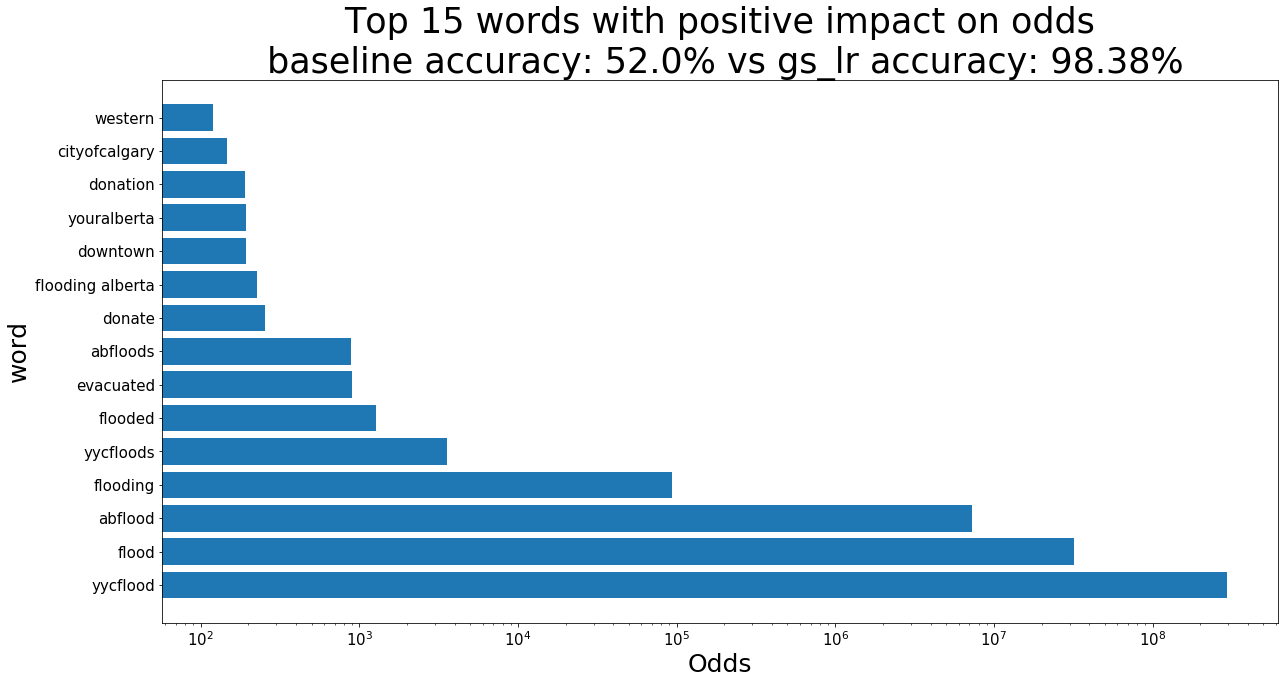

In [342]:
plt.figure(figsize=(20,10))
temp = gs_lr_af_coef_tfidf_df.sort_values('odds', ascending = False).head(15)
plt.barh(temp.index, temp['odds'], log = True)
plt.title(f'Top 15 words with positive impact on odds\n baseline accuracy: {np.round(y_af.value_counts(normalize = True)[1] * 100)}% vs gs_lr accuracy: {np.round((gs_lr_af.score(X_test_tfidf_af, y_test_af) * 100),2)}%', fontsize=35)
plt.xlabel('Odds', fontsize=25)
plt.ylabel('word', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

### Logistic Regression on tornado

In [343]:
tornado = final_labeled_df[final_labeled_df['type'] == 'tornado']

In [344]:
tornado.shape

(9992, 7)

In [345]:
tornado.head()

,id,text,label_on-topic,type,processed,tokenized,lemmatized
0,'336908711324962817',@HeatleyJheat44 its barley even raining where ...,1,tornado,heatleyjheat44 its barley even raining where i...,"[heatleyjheat44, its, barley, even, raining, w...",heatleyjheat44 it barley even raining where i ...
1,'337052158035890176',Sorry I can't do anything right.,0,tornado,sorry i can't do anything right.,"[sorry, i, can, t, do, anything, right]",sorry i can t do anything right
2,'339338021751103488',@mrwendell29: @BradSowderWX says we have the ...,1,tornado,mrwendell29: bradsowderwx says we have the ris...,"[mrwendell29, bradsowderwx, says, we, have, th...",mrwendell29 bradsowderwx say we have the risk ...
3,'336339509077762051',#honestyhour I like to wear half split running...,0,tornado,honestyhour i like to wear half split running ...,"[honestyhour, i, like, to, wear, half, split, ...",honestyhour i like to wear half split running ...
4,'337734129972035584',I'm too stressed to have a good summer,0,tornado,i'm too stressed to have a good summer,"[i, m, too, stressed, to, have, a, good, summer]",i m too stressed to have a good summer


In [346]:
X_ok = tornado[['lemmatized']]
y_ok = tornado['label_on-topic']

In [347]:
X_train_ok, X_test_ok, y_train_ok, y_test_ok = train_test_split(X_ok, y_ok, stratify = y_ok, random_state = 42)

In [348]:
y_ok.value_counts(normalize = True)

0    0.516914
1    0.483086
Name: label_on-topic, dtype: float64

In [349]:
X_train_ok.head()

,lemmatized
3261,regginaaal prolly not i think he should call b...
8822,rt tswiftontour taylor singing safe and sound ...
673,timcberry oklahomafacts jaskline2007 he ha man...
2004,goose2tavo5 i probably got a 5 out of 20 then lol
3357,tiiiuhh ungrateful as all yo as had to wa say ...


In [350]:
X_train_tfidf_ok = pd.DataFrame(tfidf.fit_transform(X_train_ok['lemmatized']).todense(), 
                          columns = tfidf.get_feature_names()) 

In [351]:
X_test_tfidf_ok = pd.DataFrame(tfidf.transform(X_test_ok['lemmatized']).todense(),
                          columns = tfidf.get_feature_names()) 

In [352]:
from sklearn.linear_model import LogisticRegression

In [353]:
lr_ok = LogisticRegression()

small c refers to strong regularization; l1 refers to lasso and l2 refers to ridge

In [354]:
lr_ok_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty' : ['l1','l2']}

In [355]:
gs_lr_ok = GridSearchCV(lr_ok, param_grid = lr_ok_params, scoring = 'roc_auc', cv = 3)
gs_lr_ok.fit(X_train_tfidf_ok, y_train_ok)
print(gs_lr_ok.best_score_)
gs_lr_ok.best_params_

0.9741216973432576


{'C': 10, 'penalty': 'l2'}

In [356]:
gs_lr_ok.score(X_test_tfidf_ok, y_test_ok)

0.9755595586550698

In [357]:
gs_lr_ok_coef_tfidf_df = pd.DataFrame(gs_lr_ok.best_estimator_.coef_, columns = X_train_tfidf_ok.columns).T

In [358]:
gs_lr_ok_coef_tfidf_df.columns = ['weights']

In [359]:
gs_lr_ok_coef_tfidf_df['odds'] = np.exp(gs_lr_ok_coef_tfidf_df['weights'])

In [360]:
gs_lr_ok_coef_tfidf_df.sort_values(ascending=False, by='weights').head(15)

,weights,odds
tornado,12.826960,372115.627128
oklahoma,9.867700,19296.902355
prayforoklahoma,9.676835,15943.946713
prayer,8.141394,3433.700250
victim,7.745420,2310.963310
donation,6.771432,872.560845
devastation,6.603961,738.012883
redcross,5.847368,346.321788
survivor,5.541677,255.105458
relief,5.521786,250.081308


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text yticklabel objects>)

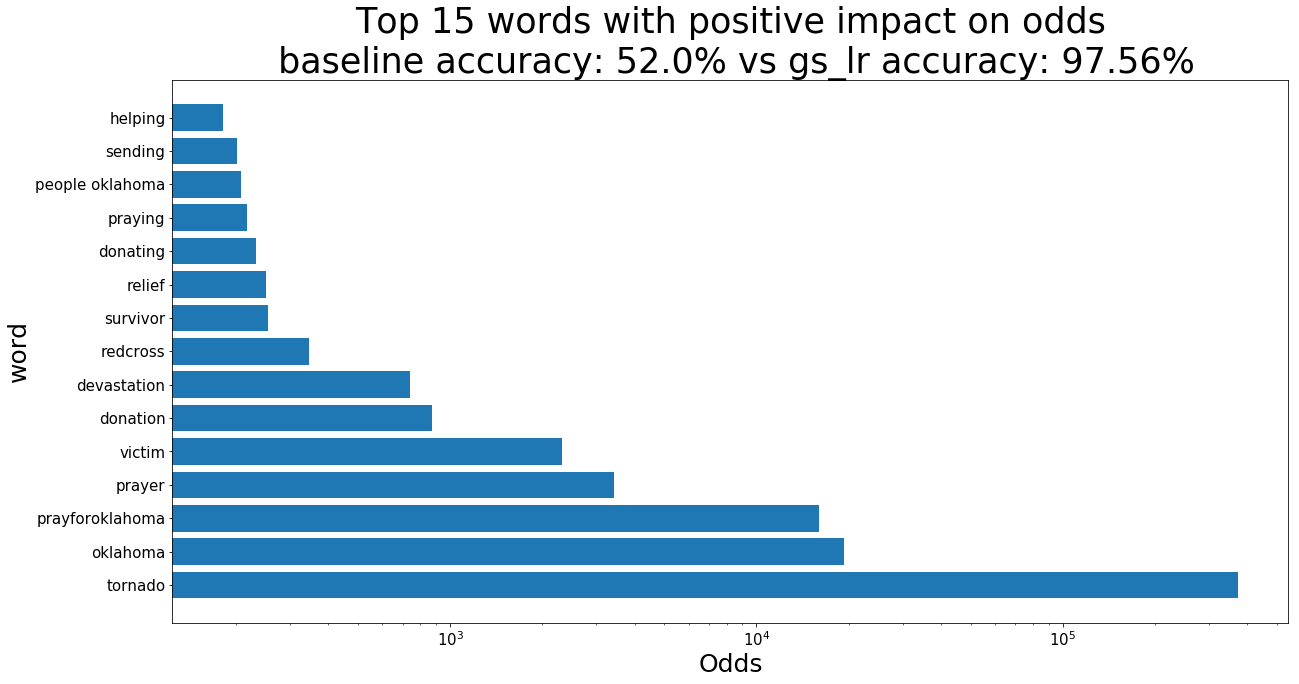

In [361]:
plt.figure(figsize=(20,10))
temp = gs_lr_ok_coef_tfidf_df.sort_values('odds', ascending = False).head(15)
plt.barh(temp.index, temp['odds'], log = True)
plt.title(f'Top 15 words with positive impact on odds\n baseline accuracy: {np.round(y_ok.value_counts(normalize = True)[0] * 100)}% vs gs_lr accuracy: {np.round((gs_lr_ok.score(X_test_tfidf_ok, y_test_ok) * 100),2)}%', fontsize=35)
plt.xlabel('Odds', fontsize=25)
plt.ylabel('word', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

### Logistic Regression on original dataframe

We have shown that the logistic regression does well on a certain disaster (above). We will now explore if it can also classify well on the entire original dataframe without filtering for a certain disaster.

In [362]:
final_labeled_df.head()

,id,text,label_on-topic,type,processed,tokenized,lemmatized
0,'262596552399396864',I've got enough candles to supply a Mexican fa...,0,hurricane,i've got enough candles to supply a mexican fa...,"[i, ve, got, enough, candles, to, supply, a, m...",i ve got enough candle to supply a mexican family
1,'263044104500420609',Sandy be soooo mad that she be shattering our ...,1,hurricane,sandy be soooo mad that she be shattering our ...,"[sandy, be, soooo, mad, that, she, be, shatter...",sandy be soooo mad that she be shattering our ...
2,'263309629973491712',@ibexgirl thankfully Hurricane Waugh played it...,0,hurricane,ibexgirl thankfully hurricane waugh played it ...,"[ibexgirl, thankfully, hurricane, waugh, playe...",ibexgirl thankfully hurricane waugh played it ...
3,'263422851133079552',@taos you never got that magnificent case of B...,0,hurricane,taos you never got that magnificent case of bu...,"[taos, you, never, got, that, magnificent, cas...",tao you never got that magnificent case of bur...
4,'262404311223504896',"I'm at Mad River Bar &amp; Grille (New York, N...",0,hurricane,"i'm at mad river bar &amp; grille (new york, n...","[i, m, at, mad, river, bar, amp, grille, new, ...",i m at mad river bar amp grille new york ny URL


In [363]:
X = final_labeled_df[['lemmatized']]
y = final_labeled_df['label_on-topic']

In [364]:
y.value_counts(normalize = True)

1    0.538339
0    0.461661
Name: label_on-topic, dtype: float64

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [366]:
X_train.head()

,lemmatized
1046,this aint even that bad anyone remember that e...
2772,derek pushing people away to keep them safe ho...
1716,bye ocean grove fishing pier ocean grove fishi...
2669,gotta get ready for the storm of the century h...
8759,rt prodigypimpwalk romney said he ll stop the ...


In [367]:
X_train_tfidf = pd.DataFrame(tfidf.fit_transform(X_train['lemmatized']).todense(), ##todense is 'expanding' the compressed version (adding 0's)
                          columns = tfidf.get_feature_names()) 

In [368]:
X_test_tfidf = pd.DataFrame(tfidf.transform(X_test['lemmatized']).todense(), ##todense is 'expanding' the compressed version (adding 0's)
                          columns = tfidf.get_feature_names()) 

In [369]:
from sklearn.linear_model import LogisticRegression

In [370]:
lr = LogisticRegression()

In [371]:
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty' : ['l1','l2']}

In [372]:
gs_lr = GridSearchCV(lr, param_grid = lr_params, scoring = 'roc_auc', cv = 3)
gs_lr.fit(X_train_tfidf, y_train)
print(gs_lr.best_score_)
gs_lr.best_params_

0.978972202453376


{'C': 1, 'penalty': 'l2'}

In [373]:
gs_lr.score(X_test_tfidf, y_test)

0.9771191806328483

In [374]:
gs_lr_coef_tfidf_df = pd.DataFrame(gs_lr.best_estimator_.coef_, columns = X_train_tfidf.columns).T

In [375]:
gs_lr_coef_tfidf_df.columns = ['weights']

In [376]:
gs_lr_coef_tfidf_df['odds'] = np.exp(gs_lr_coef_tfidf_df['weights'])

In [377]:
gs_lr_coef_tfidf_df.sort_values(ascending=False, by='weights').head(15)

,weights,odds
hurricane,16.979624,2.366774e+07
flood,16.471080,1.423309e+07
yycflood,11.552700,1.040576e+05
sandy,10.151130,2.562005e+04
abflood,9.690261,1.615945e+04
tornado,9.343182,1.142070e+04
flooding,7.333959,1.531433e+03
oklahoma,7.309085,1.493810e+03
storm,6.446426,6.304451e+02
queensland,6.375990,5.875666e+02


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text yticklabel objects>)

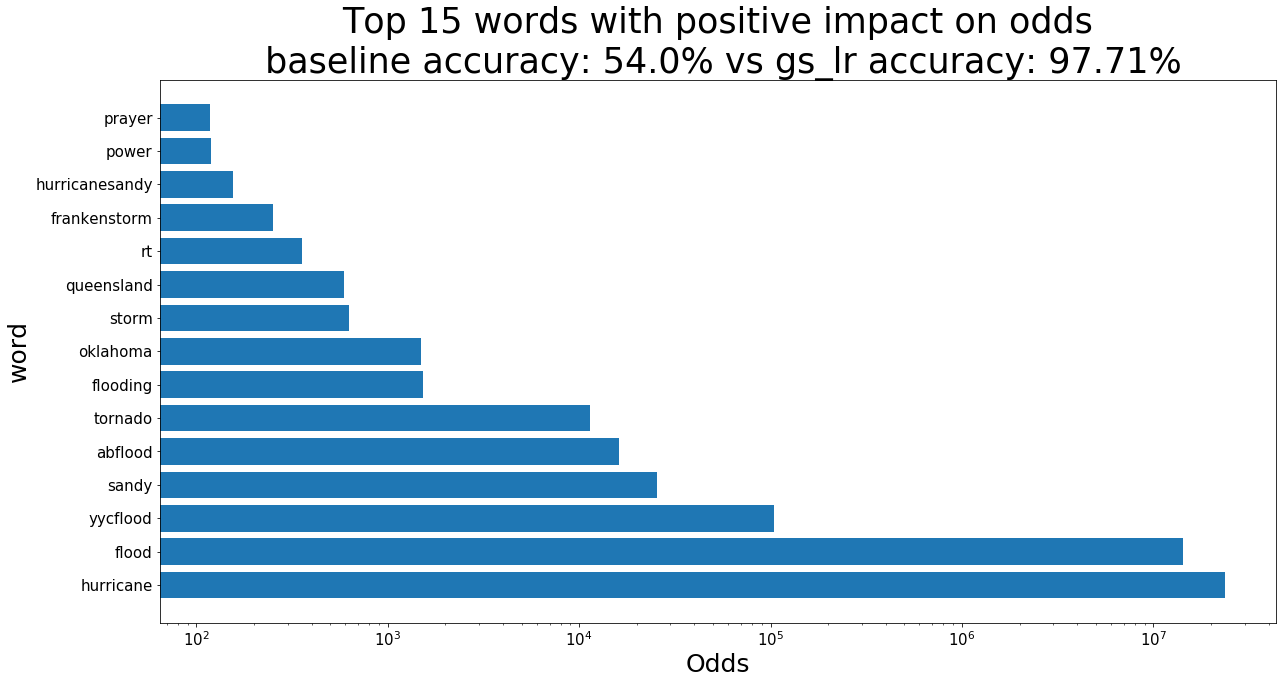

In [378]:
plt.figure(figsize=(20,10))
temp = gs_lr_coef_tfidf_df.sort_values('odds', ascending = False).head(15)
plt.barh(temp.index, temp['odds'], log = True)
plt.title(f'Top 15 words with positive impact on odds\n baseline accuracy: {np.round(y.value_counts(normalize = True)[1] * 100)}% vs gs_lr accuracy: {np.round((gs_lr.score(X_test_tfidf, y_test) * 100),2)}%', fontsize=35)
plt.xlabel('Odds', fontsize=25)
plt.ylabel('word', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

### Pickling

Pickling out alberta flood and oklahoma tornado logistic regression models:

In [379]:
with open('./assets/lr_af.pkl', 'wb+') as f:
    pickle.dump(lr_af, f)

In [380]:
with open('./assets/lr_ok.pkl', 'wb+') as f:
    pickle.dump(lr_ok, f)

Pickling out original dataset logistic regression model:

In [381]:
with open('./assets/lr.pkl', 'wb+') as f:
    pickle.dump(lr, f)

## Singular Value Decomposition (02_EDA_and_Cleaning)